<div>
    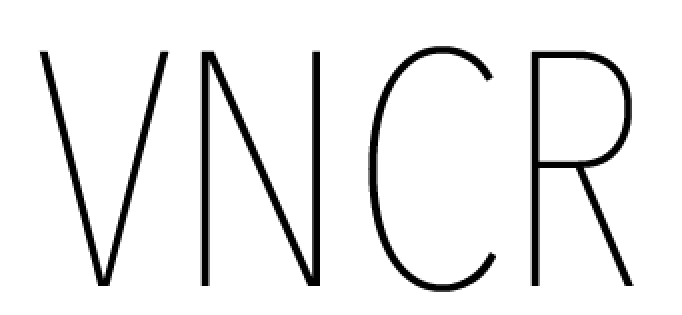
</div>  


<font color="darkblue"><div style="text-align: center;">
    <h2>Technical Test : Alzheimer's Disease Deaths Analysis</h2>
</div></font>

# 1. Importing Packages and Reading Dataset

In [1]:
# Data Science Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For API 
import requests

C:\Users\clt\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
alzheimerdf=pd.read_csv("dementia-death-rates new.csv") ##read data and save it as a dataframe
alzheimerdf

,Entity,Code,Year,Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,31.83
1,African Region (WHO),0,1990,23.04
2,Albania,ALB,1990,24.78
3,Algeria,DZA,1990,28.78
4,American Samoa,ASM,1990,24.21
...,...,...,...,...
6835,World Bank Lower Middle Income,0,2019,21.38
6836,World Bank Upper Middle Income,0,2019,23.33
6837,Yemen,YEM,2019,25.48
6838,Zambia,ZMB,2019,25.39


# 2. Data Cleaning

In [3]:
alzheimerdf.shape # rows, columns

(6840, 4)

In [4]:
alzheimerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Entity                                                                                       6840 non-null   object 
 1   Code                                                                                         6840 non-null   object 
 2   Year                                                                                         6840 non-null   int64  
 3   Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [5]:
alzheimerdf.isna().sum() #sum of nulls

Entity                                                                                         0
Code                                                                                           0
Year                                                                                           0
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)    0
dtype: int64

In [6]:
len(alzheimerdf[alzheimerdf.duplicated()]) ## see if there is duplicated rows

0

In [7]:
alzheimerdf.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [8]:
alzheimerdf.rename(columns={
    "Entity":"Country",
    "Code":"Country_Code",
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)":"Alz_Death_Rate"
},inplace=True) ## rename columns

In [9]:
alzheimerdf

,Country,Country_Code,Year,Alz_Death_Rate
0,Afghanistan,AFG,1990,31.83
1,African Region (WHO),0,1990,23.04
2,Albania,ALB,1990,24.78
3,Algeria,DZA,1990,28.78
4,American Samoa,ASM,1990,24.21
...,...,...,...,...
6835,World Bank Lower Middle Income,0,2019,21.38
6836,World Bank Upper Middle Income,0,2019,23.33
6837,Yemen,YEM,2019,25.48
6838,Zambia,ZMB,2019,25.39


In [10]:
print('Values of Country: ',alzheimerdf['Country'].unique())
print('Values of Country_Code: ',alzheimerdf['Country_Code'].unique())
print('Values of Year: ',alzheimerdf['Year'].unique())
print('Values of Alz_Death_Rate: ',alzheimerdf['Alz_Death_Rate'].unique())

Values of Country:  ['Afghanistan' 'African Region (WHO)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia & Pacific (WB)'
 'East Timor' 'Eastern Mediterranean Region (WHO)' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe & Central Asia (WB)'
 'European Region (WHO)' 'Fiji' 'Finland' 'France' 'G20' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Gh

In [11]:
# Lets see the countries with country code 0
alzheimerdf[alzheimerdf.Country_Code=="0"]

,Country,Country_Code,Year,Alz_Death_Rate
1,African Region (WHO),0,1990,23.04
54,East Asia & Pacific (WB),0,1990,22.98
56,Eastern Mediterranean Region (WHO),0,1990,23.00
60,England,0,1990,21.10
66,Europe & Central Asia (WB),0,1990,22.14
...,...,...,...,...
6831,Western Pacific Region (WHO),0,2019,24.97
6833,World Bank High Income,0,2019,22.60
6834,World Bank Low Income,0,2019,25.16
6835,World Bank Lower Middle Income,0,2019,21.38


In [12]:
# percentage of invalid data countains country code = 0
len(alzheimerdf[alzheimerdf.Country_Code=="0"].Country)/len(alzheimerdf)*100

10.087719298245613

In [13]:
alzheimerdf[alzheimerdf.Country_Code=="0"].Country.unique()

array(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'Latin America & Caribbean (WB)',
       'Middle East & North Africa (WB)', 'North America (WB)',
       'Northern Ireland', 'OECD Countries',
       'Region of the Americas (WHO)', 'Scotland', 'South Asia (WB)',
       'South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Wales',
       'Western Pacific Region (WHO)', 'World Bank High Income',
       'World Bank Low Income', 'World Bank Lower Middle Income',
       'World Bank Upper Middle Income'], dtype=object)

### Since their country code is 0 and they are not countries (or included within another countries) and their percentage is only 10% and the api dataset i will integrate with focuses on countries and their code i will drop them to make sure of the validity of our data

In [14]:
alzheimerdf=alzheimerdf[alzheimerdf['Country_Code'] != '0'] ## drop countries with code 0

In [15]:
alzheimerdf.shape

(6150, 4)

In [16]:
alzheimerdf.Country_Code.unique() # no 0 dropped succefully

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS',
       'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI',
       'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL',
       'NLD', 'NZL',

### but we can still see a weird value which is OWID_WRL Lets see what is it

In [17]:
alzheimerdf[alzheimerdf["Country_Code"] =="OWID_WRL" ]

,Country,Country_Code,Year,Alz_Death_Rate
220,World,OWID_WRL,1990,22.24
448,World,OWID_WRL,1991,22.31
676,World,OWID_WRL,1992,22.39
904,World,OWID_WRL,1993,22.49
1132,World,OWID_WRL,1994,22.55
1360,World,OWID_WRL,1995,22.59
1588,World,OWID_WRL,1996,22.60
1816,World,OWID_WRL,1997,22.57
2044,World,OWID_WRL,1998,22.55
2272,World,OWID_WRL,1999,22.53


### We can see that it is basically for the world in each year -- since it is dependent on countries and we are interested in countries only and if we needed it later we can conclude it from all countries we have (and we will integrate with dataset countains countries so we will drop them also

In [18]:
alzheimerdf=alzheimerdf[alzheimerdf["Country_Code"] !="OWID_WRL" ]

In [19]:
alzheimerdf.Country_Code.unique() # all of them contains code of 3 numbers now there no 0 also

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS',
       'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI',
       'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL',
       'NLD', 'NZL',

In [20]:
alzheimerdf.head()

,Country,Country_Code,Year,Alz_Death_Rate
0,Afghanistan,AFG,1990,31.83
2,Albania,ALB,1990,24.78
3,Algeria,DZA,1990,28.78
4,American Samoa,ASM,1990,24.21
5,Andorra,AND,1990,21.23


In [21]:
# lets check for values again
print('Values of Country: ',alzheimerdf['Country'].unique())
print('Values of Country_Code: ',alzheimerdf['Country_Code'].unique())
print('Values of Year: ',alzheimerdf['Year'].unique())
print('Values of Alz_Death_Rate: ',alzheimerdf['Alz_Death_Rate'].unique())

Values of Country:  ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' '

### we can see that our data is clean now there no problems in our data consistency, completness, uniformity or validity

# 3. Data Integration

### i will call this dataset 
 
### from WHO Global Health Observatory API
It basically shows us the death rate from non-communicable diseases (NCDs), per 100,000 people in a population.
We can see the metadata from here : https://www.who.int/data/gho/indicator-metadata-registry/imr-details/78

### first this data shows that the rate is per 100,000 population so we need to make sure that our alzheimer dataset shows 
### the rate with the same scale (per 100,000 population also)
### from kaggle we can know that 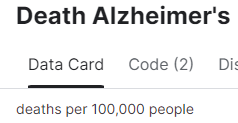
### which is great!!!!!

In [22]:
# retrieve data from api
url = "https://ghoapi.azureedge.net/api/WHS2_131"
response = requests.get(url)

In [23]:
data = response.json()

In [24]:
deathncd_df = pd.DataFrame(data['value'])

In [25]:
deathncd_df

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,2285225,WHS2_131,COUNTRY,ERI,AFR,YEAR,Africa,SEX,SEX_MLE,2004,...,None,947.3 [482.4-1647.4],947.3319,482.3962,1647.3520,None,2021-02-09T16:38:56+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
1,2285764,WHS2_131,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_BTSX,2011,...,None,358.0 [279.2-457.3],357.9637,279.2423,457.2814,None,2021-02-09T16:24:42+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00
2,2286079,WHS2_131,COUNTRY,CAN,AMR,YEAR,Americas,SEX,SEX_BTSX,2007,...,None,354.1 [279.0-444.9],354.0722,278.9895,444.9105,None,2021-02-09T16:30:58+01:00,2007,2007-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00
3,2286292,WHS2_131,COUNTRY,IND,SEAR,YEAR,South-East Asia,SEX,SEX_MLE,2008,...,None,736.3 [570.0-928.3],736.3313,570.0348,928.2706,None,2021-02-09T16:48:00+01:00,2008,2008-01-01T00:00:00+01:00,2008-12-31T00:00:00+01:00
4,2286600,WHS2_131,COUNTRY,ATG,AMR,YEAR,Americas,SEX,SEX_FMLE,2008,...,None,435.1 [308.7-602.3],435.0726,308.7126,602.2715,None,2021-02-09T16:22:51+01:00,2008,2008-01-01T00:00:00+01:00,2008-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,2256770,WHS2_131,COUNTRY,SOM,EMR,YEAR,Eastern Mediterranean,SEX,SEX_MLE,2013,...,None,931.1 [472.9-1696.8],931.0681,472.8714,1696.7710,None,2021-02-09T17:13:20+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
11636,2257535,WHS2_131,COUNTRY,KAZ,EUR,YEAR,Europe,SEX,SEX_BTSX,2004,...,None,984.8 [789.0-1208.7],984.7850,789.0117,1208.6660,None,2021-02-09T16:51:29+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
11637,2264103,WHS2_131,COUNTRY,EGY,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2003,...,None,787.3 [506.4-1188.6],787.3369,506.4051,1188.6310,None,2021-02-09T16:38:34+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00
11638,2264123,WHS2_131,COUNTRY,CHL,AMR,YEAR,Americas,SEX,SEX_BTSX,2014,...,None,362.0 [268.9-478.7],361.9980,268.9302,478.7385,None,2021-02-09T16:31:43+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00


In [26]:
deathncd_df.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd'],
      dtype='object')

In [27]:
deathncd_df.shape

(11640, 25)

In [28]:
# let's keep only the columns we are interested in
deathncd_df = deathncd_df[["SpatialDim","TimeDimensionValue",'ParentLocationCode', 'ParentLocation',"NumericValue"]]

In [29]:
deathncd_df

,SpatialDim,TimeDimensionValue,ParentLocationCode,ParentLocation,NumericValue
0,ERI,2004,AFR,Africa,947.3319
1,BEL,2011,EUR,Europe,357.9637
2,CAN,2007,AMR,Americas,354.0722
3,IND,2008,SEAR,South-East Asia,736.3313
4,ATG,2008,AMR,Americas,435.0726
...,...,...,...,...,...
11635,SOM,2013,EMR,Eastern Mediterranean,931.0681
11636,KAZ,2004,EUR,Europe,984.7850
11637,EGY,2003,EMR,Eastern Mediterranean,787.3369
11638,CHL,2014,AMR,Americas,361.9980


In [30]:
# Let's rename columns 
deathncd_df.rename(columns={
    "SpatialDim":"Country_Code",
    "TimeDimensionValue":"Year",
    "NumericValue":"Total_NCD_Death_Rate"
},inplace=True)

C:\Users\clt\AppData\Local\Temp\ipykernel_196\1873816036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deathncd_df.rename(columns={


In [31]:
deathncd_df

,Country_Code,Year,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
0,ERI,2004,AFR,Africa,947.3319
1,BEL,2011,EUR,Europe,357.9637
2,CAN,2007,AMR,Americas,354.0722
3,IND,2008,SEAR,South-East Asia,736.3313
4,ATG,2008,AMR,Americas,435.0726
...,...,...,...,...,...
11635,SOM,2013,EMR,Eastern Mediterranean,931.0681
11636,KAZ,2004,EUR,Europe,984.7850
11637,EGY,2003,EMR,Eastern Mediterranean,787.3369
11638,CHL,2014,AMR,Americas,361.9980


In [32]:
deathncd_df.Country_Code.unique()

array(['ERI', 'BEL', 'CAN', 'IND', 'ATG', 'GNQ', 'CHE', 'NLD', 'THA',
       'ETH', 'EGY', 'TUR', 'BGR', 'COD', 'SYR', 'ESP', 'YEM', 'TKM',
       'VEN', 'TZA', 'CIV', 'MAR', 'IRQ', 'ITA', 'EST', 'NIC', 'KIR',
       'MNE', 'KGZ', 'ARG', 'LBN', 'LBR', 'CUB', 'DZA', 'BRN', 'SRB',
       'TJK', 'GIN', 'USA', 'SSD', 'BDI', 'GRD', 'UZB', 'DNK', 'CYP',
       'VUT', 'UGA', 'MDV', 'CPV', 'JOR', 'MDG', 'WB_HI', 'FSM', 'SYC',
       'PNG', 'SLV', 'COG', 'SEAR', 'FJI', 'ZAF', 'PER', 'IRN', 'PRT',
       'GHA', 'KHM', 'UKR', 'DEU', 'BHS', 'CHN', 'MKD', 'SWE', 'JAM',
       'HUN', 'MRT', 'SUR', 'NPL', 'AGO', 'COL', 'MLI', 'ISL', 'LCA',
       'CAF', 'SGP', 'BGD', 'STP', 'PAK', 'HTI', 'KOR', 'BFA', 'QAT',
       'OMN', 'TCD', 'TUN', 'SLB', 'SAU', 'LTU', 'BLZ', 'RWA', 'WB_LI',
       'ISR', 'SEN', 'CHL', 'MMR', 'AFG', 'DJI', 'ALB', 'MNG', 'SWZ',
       'ARM', 'TLS', 'SOM', 'MLT', 'AUS', 'IDN', 'MOZ', 'AUT', 'GRC',
       'VCT', 'SVN', 'ZMB', 'KEN', 'BRB', 'GNB', 'MEX', 'LVA', 'CMR',
       'LBY', '

In [33]:
deathncd_df.Country_Code[deathncd_df['Country_Code'].apply(lambda x: len(x) != 3)].unique()

array(['WB_HI', 'SEAR', 'WB_LI', 'WB_LMI', 'WB_UMI', 'GLOBAL'],
      dtype=object)

In [34]:
### there are some values that are not valid in country code but it will vanish with the inner join
### cause it will keep only the values matching in the first dataframe

In [35]:
deathncd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11640 entries, 0 to 11639
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country_Code          11640 non-null  object 
 1   Year                  11640 non-null  object 
 2   ParentLocationCode    10980 non-null  object 
 3   ParentLocation        10980 non-null  object 
 4   Total_NCD_Death_Rate  11640 non-null  float64
dtypes: float64(1), object(4)
memory usage: 454.8+ KB


In [36]:
deathncd_df['Year'] = deathncd_df['Year'].astype(int) ## convert year data type to int

C:\Users\clt\AppData\Local\Temp\ipykernel_196\3515759417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deathncd_df['Year'] = deathncd_df['Year'].astype(int) ## convert year data type to int


In [37]:
integrated_df = pd.merge(alzheimerdf, deathncd_df, on=['Country_Code', 'Year'], how='inner') ##inner join

In [38]:
integrated_df

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
0,Afghanistan,AFG,2000,31.30,EMR,Eastern Mediterranean,999.0082
1,Afghanistan,AFG,2000,31.30,EMR,Eastern Mediterranean,1085.5330
2,Afghanistan,AFG,2000,31.30,EMR,Eastern Mediterranean,1041.6340
3,Albania,ALB,2000,24.32,EUR,Europe,818.0956
4,Albania,ALB,2000,24.32,EUR,Europe,516.7255
...,...,...,...,...,...,...,...
10975,Zambia,ZMB,2019,25.39,AFR,Africa,679.4242
10976,Zambia,ZMB,2019,25.39,AFR,Africa,568.1492
10977,Zimbabwe,ZWE,2019,25.01,AFR,Africa,827.6807
10978,Zimbabwe,ZWE,2019,25.01,AFR,Africa,677.2407


In [39]:
integrated_df.Country_Code.unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT',
       'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI',
       'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO',
       'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG',
       'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'FSM',
       'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD',
       'NZL', 'NIC', 'NER', 'NGA', 'PRK', 'MKD', 'NOR', 'OMN', 'PAK',
       'PAN', 'PNG',

In [40]:
integrated_df.sort_values(by=['Year',"Country_Code","Total_NCD_Death_Rate"])

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
0,Afghanistan,AFG,2000,31.30,EMR,Eastern Mediterranean,999.0082
2,Afghanistan,AFG,2000,31.30,EMR,Eastern Mediterranean,1041.6340
1,Afghanistan,AFG,2000,31.30,EMR,Eastern Mediterranean,1085.5330
10,Angola,AGO,2000,23.37,AFR,Africa,647.9006
9,Angola,AGO,2000,23.37,AFR,Africa,775.0211
...,...,...,...,...,...,...,...
10975,Zambia,ZMB,2019,25.39,AFR,Africa,679.4242
10974,Zambia,ZMB,2019,25.39,AFR,Africa,830.0696
10978,Zimbabwe,ZWE,2019,25.01,AFR,Africa,677.2407
10979,Zimbabwe,ZWE,2019,25.01,AFR,Africa,734.9780


### There are unnecessary duplications for each country and year in the dataset because each has three values from the Total_NCD_Death_Rate category. Referring to the data source on WHO, these three values represent the minimum, maximum, and expected values. The focus should be on the expected value, which lies between the minimum and maximum values

In [41]:
df=integrated_df.groupby(['Country_Code', 'Year']).apply(lambda group: group.nlargest(2, 'Total_NCD_Death_Rate').iloc[-1]).reset_index(drop=True)
## this for grouping by country code and year and keep for them the second largest value in Total death rate

C:\Users\clt\AppData\Local\Temp\ipykernel_196\3985666250.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df=integrated_df.groupby(['Country_Code', 'Year']).apply(lambda group: group.nlargest(2, 'Total_NCD_Death_Rate').iloc[-1]).reset_index(drop=True)


In [42]:
df[df.Country_Code=="EGY"]

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
980,Egypt,EGY,2000,22.65,EMR,Eastern Mediterranean,714.1895
981,Egypt,EGY,2001,22.84,EMR,Eastern Mediterranean,746.2472
982,Egypt,EGY,2002,23.32,EMR,Eastern Mediterranean,760.3599
983,Egypt,EGY,2003,23.98,EMR,Eastern Mediterranean,787.3369
984,Egypt,EGY,2004,24.34,EMR,Eastern Mediterranean,768.8781
985,Egypt,EGY,2005,24.32,EMR,Eastern Mediterranean,760.7203
986,Egypt,EGY,2006,24.05,EMR,Eastern Mediterranean,756.2096
987,Egypt,EGY,2007,23.87,EMR,Eastern Mediterranean,751.8236
988,Egypt,EGY,2008,23.85,EMR,Eastern Mediterranean,759.0561
989,Egypt,EGY,2009,23.80,EMR,Eastern Mediterranean,766.4754


comparing our results to the dataset on WHC Website filtering by egypt only
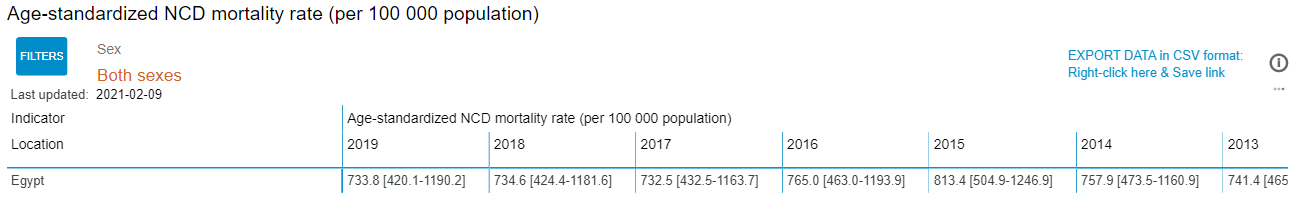

## we can see that the Total_NCD_Death_Rate matches the original WHC Dataset on website so we're good !!!!

# 4. Data Analysis

In [43]:
df

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
0,Afghanistan,AFG,2000,31.30,EMR,Eastern Mediterranean,1041.6340
1,Afghanistan,AFG,2001,31.19,EMR,Eastern Mediterranean,1050.8080
2,Afghanistan,AFG,2002,31.11,EMR,Eastern Mediterranean,1051.9050
3,Afghanistan,AFG,2003,31.04,EMR,Eastern Mediterranean,1042.0000
4,Afghanistan,AFG,2004,30.98,EMR,Eastern Mediterranean,1038.1970
...,...,...,...,...,...,...,...
3655,Zimbabwe,ZWE,2015,24.83,AFR,Africa,800.0917
3656,Zimbabwe,ZWE,2016,24.88,AFR,Africa,782.6051
3657,Zimbabwe,ZWE,2017,24.91,AFR,Africa,755.6024
3658,Zimbabwe,ZWE,2018,24.97,AFR,Africa,738.4620


In [44]:
df.shape

(3660, 7)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               3660 non-null   object 
 1   Country_Code          3660 non-null   object 
 2   Year                  3660 non-null   int64  
 3   Alz_Death_Rate        3660 non-null   float64
 4   ParentLocationCode    3660 non-null   object 
 5   ParentLocation        3660 non-null   object 
 6   Total_NCD_Death_Rate  3660 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 200.3+ KB


In [123]:
df.describe() #descriptive statistics

,Year,Alz_Death_Rate,Total_NCD_Death_Rate
count,3660.000000,3660.000000,3660.000000
mean,2009.500000,23.487522,608.699120
std,5.767069,2.458813,194.712866
min,2000.000000,15.850000,233.279400
25%,2004.750000,21.600000,461.015300
50%,2009.500000,23.330000,606.812450
75%,2014.250000,25.160000,717.431400
max,2019.000000,33.290000,1424.009000


In [48]:
## how many countries we have now 
print("No. of countries: ",len(df.Country.unique()))
df.Country.unique()

No. of countries:  183


array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia',
       'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Micronesia (country)', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada',
       'Guate

In [49]:
df.Country_Code.value_counts().unique() # there are 20 values for each country because there is value for each 20 year

array([20], dtype=int64)

In [50]:
## number of parent locartion we have
print("No. of Parent Location: ",len(df.ParentLocation.unique()))
df.ParentLocation.unique()

No. of Parent Location:  6


array(['Eastern Mediterranean', 'Africa', 'Europe', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [134]:
## percentage of dying from alzheimer disease rather than Total NCD deaths
print(sum(df.Alz_Death_Rate)/sum(df.Total_NCD_Death_Rate)*100,"%")

3.858642321993748 %


### for associated values

In [51]:
df.sort_values(by="Total_NCD_Death_Rate").head(10) ## top 10 lowest values of NCD Death for a country in a year

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
2878,Singapore,SGP,2018,22.02,WPR,Western Pacific,233.2794
2879,Singapore,SGP,2019,21.86,WPR,Western Pacific,234.8398
1699,Japan,JPN,2019,27.48,WPR,Western Pacific,235.3629
1819,South Korea,KOR,2019,23.94,WPR,Western Pacific,237.0526
2877,Singapore,SGP,2017,22.03,WPR,Western Pacific,238.9244
1696,Japan,JPN,2016,28.60,WPR,Western Pacific,240.4216
2876,Singapore,SGP,2016,22.08,WPR,Western Pacific,240.5533
1698,Japan,JPN,2018,27.75,WPR,Western Pacific,240.7954
1697,Japan,JPN,2017,28.00,WPR,Western Pacific,242.8418
1695,Japan,JPN,2015,29.05,WPR,Western Pacific,243.0984


In [52]:
df.sort_values(by="Total_NCD_Death_Rate",ascending=False).head(10) ## top 10 highest values of NCD Death records

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
1780,Kiribati,KIR,2000,29.56,WPR,Western Pacific,1424.009
1781,Kiribati,KIR,2001,29.63,WPR,Western Pacific,1417.845
1782,Kiribati,KIR,2002,29.71,WPR,Western Pacific,1409.400
1783,Kiribati,KIR,2003,29.87,WPR,Western Pacific,1395.079
1784,Kiribati,KIR,2004,29.93,WPR,Western Pacific,1389.004
1785,Kiribati,KIR,2005,29.98,WPR,Western Pacific,1386.398
1786,Kiribati,KIR,2006,30.31,WPR,Western Pacific,1369.945
1787,Kiribati,KIR,2007,30.71,WPR,Western Pacific,1368.684
1788,Kiribati,KIR,2008,31.16,WPR,Western Pacific,1365.382
1789,Kiribati,KIR,2009,31.37,WPR,Western Pacific,1352.952


In [53]:
df.sort_values(by="Alz_Death_Rate").head(10) ## top 10 lowest values of Alz Death records

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
1500,India,IND,2000,15.85,SEAR,South-East Asia,687.3280
1501,India,IND,2001,16.11,SEAR,South-East Asia,688.1495
1511,India,IND,2011,16.23,SEAR,South-East Asia,582.5635
1510,India,IND,2010,16.28,SEAR,South-East Asia,584.8598
1502,India,IND,2002,16.30,SEAR,South-East Asia,680.6622
1503,India,IND,2003,16.33,SEAR,South-East Asia,655.7958
1504,India,IND,2004,16.34,SEAR,South-East Asia,615.8517
2480,Nepal,NPL,2000,16.53,SEAR,South-East Asia,485.9063
1505,India,IND,2005,16.59,SEAR,South-East Asia,620.9997
2481,Nepal,NPL,2001,16.62,SEAR,South-East Asia,480.7926


In [54]:
df.sort_values(by="Alz_Death_Rate",ascending=False).head(10) ## top 10 highest values of Alz Death records

,Country,Country_Code,Year,Alz_Death_Rate,ParentLocationCode,ParentLocation,Total_NCD_Death_Rate
1799,Kiribati,KIR,2019,33.29,WPR,Western Pacific,1281.429
1798,Kiribati,KIR,2018,32.91,WPR,Western Pacific,1282.255
1797,Kiribati,KIR,2017,32.52,WPR,Western Pacific,1292.389
1796,Kiribati,KIR,2016,32.31,WPR,Western Pacific,1297.591
1795,Kiribati,KIR,2015,32.06,WPR,Western Pacific,1303.700
1794,Kiribati,KIR,2014,31.87,WPR,Western Pacific,1309.666
1793,Kiribati,KIR,2013,31.85,WPR,Western Pacific,1320.109
1792,Kiribati,KIR,2012,31.78,WPR,Western Pacific,1323.477
1791,Kiribati,KIR,2011,31.68,WPR,Western Pacific,1333.949
1790,Kiribati,KIR,2010,31.57,WPR,Western Pacific,1340.952


### for sum for each country

In [55]:
sum_df = df.groupby('Country')[['Alz_Death_Rate']].sum().reset_index()

sum_df.sort_values(by="Alz_Death_Rate").head(10) ## top lowest sum alz death rate

,Country,Alz_Death_Rate
75,India,344.14
115,Nepal,357.95
12,Bangladesh,363.95
149,Solomon Islands,392.45
98,Madagascar,393.22
97,Luxembourg,399.83
45,Denmark,400.47
29,Canada,403.70
41,Cuba,404.89
65,Greece,405.49


In [56]:
sum_df = df.groupby('Country')[['Alz_Death_Rate']].sum().reset_index()

sum_df.sort_values(by="Alz_Death_Rate", ascending=False).head(10) ## top highest sum alz death rate

,Country,Alz_Death_Rate
87,Kiribati,624.07
0,Afghanistan,616.85
124,Oman,586.93
112,Mozambique,573.19
95,Libya,569.42
60,Gabon,568.16
11,Bahrain,560.88
179,Vietnam,560.55
133,Qatar,554.73
83,Japan,551.78


In [57]:
sum_df = df.groupby('Country')[['Total_NCD_Death_Rate']].sum().reset_index()

sum_df.sort_values(by="Total_NCD_Death_Rate").head(10) ## top lowest sum ncd death rate

,Country,Total_NCD_Death_Rate
83,Japan,5288.4172
146,Singapore,5942.4819
159,Switzerland,6344.2113
7,Australia,6501.8963
59,France,6689.6537
129,Peru,6701.3909
74,Iceland,6728.1205
81,Italy,6801.6662
154,Spain,6851.8554
29,Canada,6866.1889


In [58]:
sum_df = df.groupby('Country')[['Total_NCD_Death_Rate']].sum().reset_index()

sum_df.sort_values(by="Total_NCD_Death_Rate",ascending=False).head(10) ## top highest sum ncd death rate

,Country,Total_NCD_Death_Rate
87,Kiribati,26964.2150
107,Micronesia (country),22848.3010
55,Eswatini,22465.8070
109,Mongolia,22075.4248
93,Lesotho,21558.4844
177,Vanuatu,20040.4216
31,Central African Republic,19797.1668
57,Fiji,19557.0427
0,Afghanistan,19287.1028
149,Solomon Islands,17893.1653


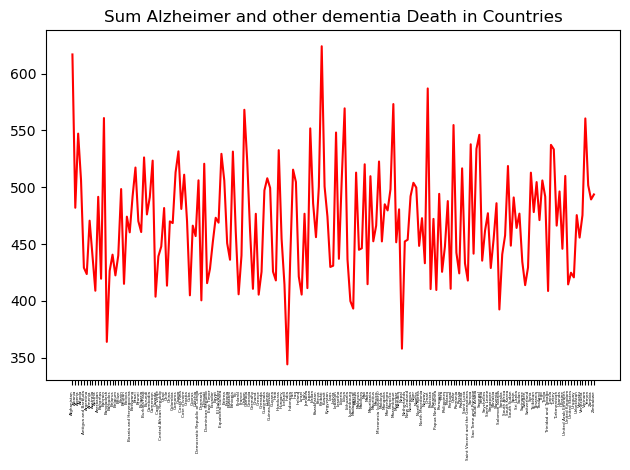

In [59]:
plt.title ("Sum Alzheimer and other dementia Death in Countries")

country_alz_sum = df.groupby('Country')['Alz_Death_Rate'].sum()

plt.plot(country_alz_sum.index, country_alz_sum.values, color="Red")

plt.xticks(rotation=90,fontsize=3)
plt.tight_layout()
plt.show()

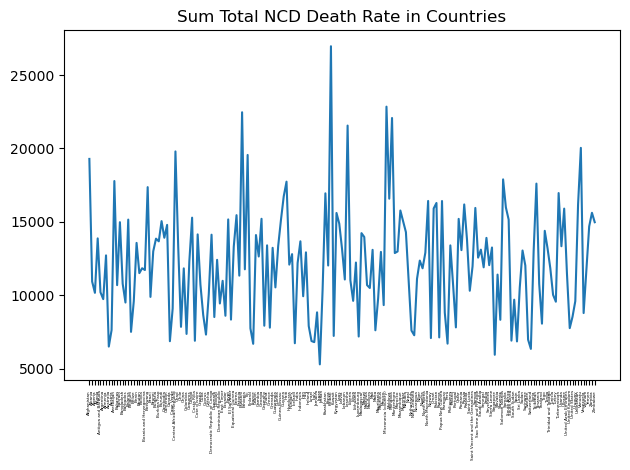

In [60]:
plt.title ("Sum Total NCD Death Rate in Countries")

country_ncd_sum = df.groupby('Country')['Total_NCD_Death_Rate'].sum()

plt.plot(country_ncd_sum.index, country_ncd_sum.values)

plt.xticks(rotation=90,fontsize=3)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

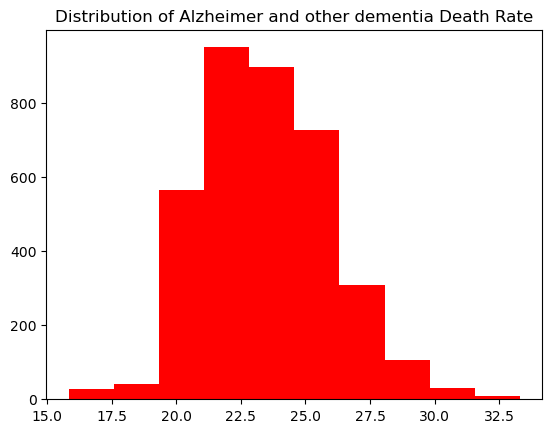

<Figure size 6000x1000 with 0 Axes>

In [61]:
plt.title("Distribution of Alzheimer and other dementia Death Rate")

plt.hist(df.Alz_Death_Rate,color="red")
plt.figure(figsize=(60,10))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

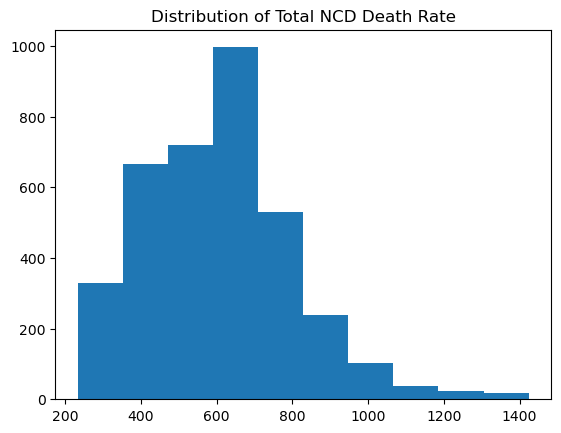

<Figure size 6000x1000 with 0 Axes>

In [62]:
plt.title("Distribution of Total NCD Death Rate")

plt.hist(df.Total_NCD_Death_Rate)
plt.figure(figsize=(60,10))

plt.show

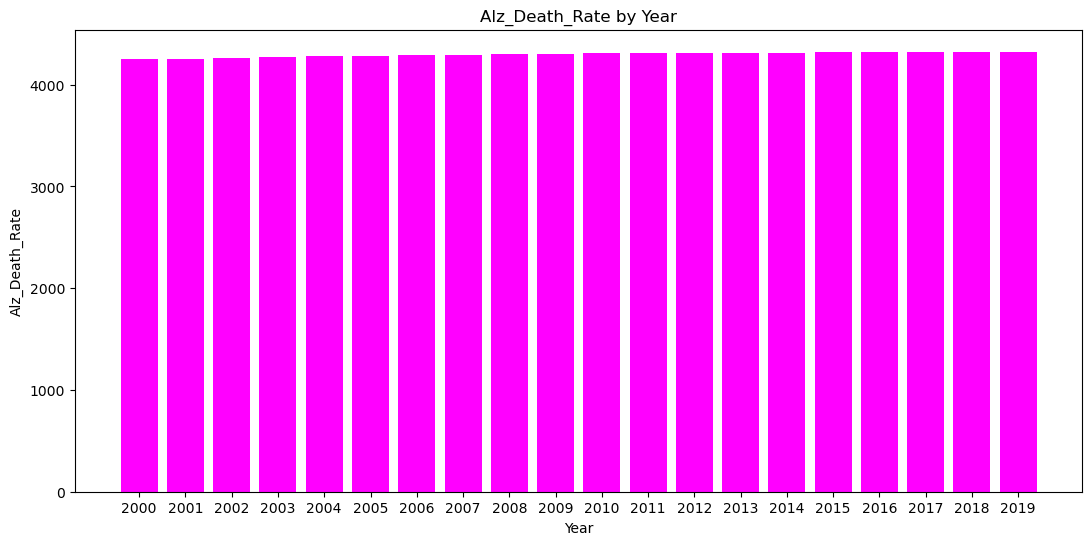

In [63]:
# Aggregate the total NCD death rate by year
yearly_totals = df.groupby('Year')['Alz_Death_Rate'].sum()

# Plotting the bar chart
plt.figure(figsize=(13, 6))
plt.bar(yearly_totals.index.astype(str), yearly_totals.values, color='magenta')

plt.xlabel('Year')
plt.ylabel('Alz_Death_Rate')
plt.title('Alz_Death_Rate by Year')


plt.show()

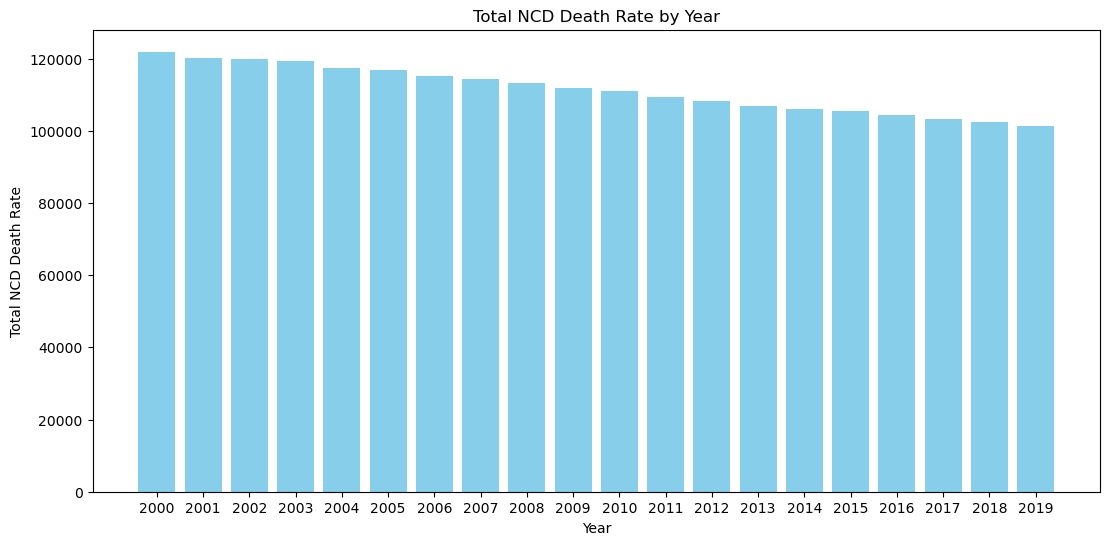

In [64]:
# Aggregate the total NCD death rate by year
yearly_totals = df.groupby('Year')['Total_NCD_Death_Rate'].sum()

plt.figure(figsize=(13, 6))
plt.bar(yearly_totals.index.astype(str), yearly_totals.values, color='skyblue')

plt.xlabel('Year')
plt.ylabel('Total NCD Death Rate')
plt.title('Total NCD Death Rate by Year')


plt.show()

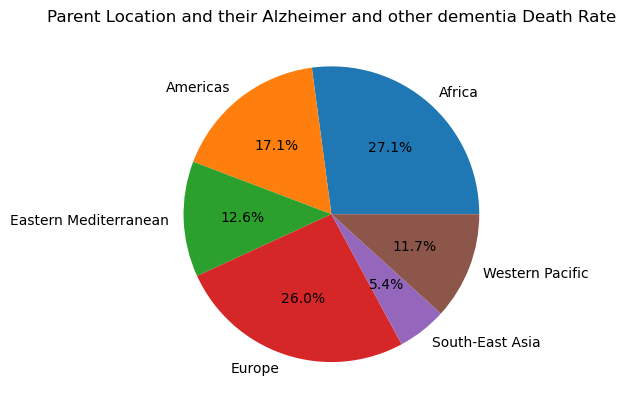

In [65]:
plt.title("Parent Location and their Alzheimer and other dementia Death Rate")

aggregated_data = df.groupby('ParentLocation')['Alz_Death_Rate'].sum()

plt.pie(aggregated_data, labels=aggregated_data.index,autopct='%0.1f%%')
plt.show()

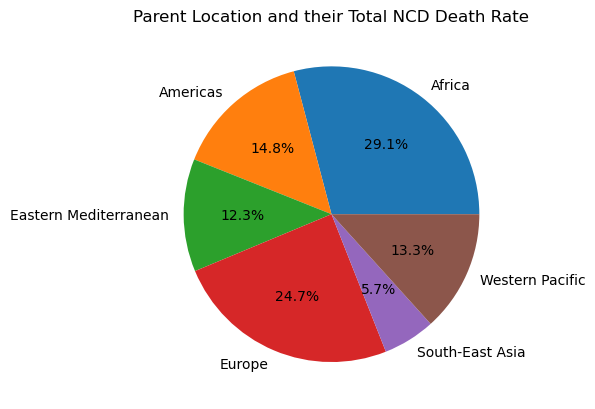

In [66]:
plt.title("Parent Location and their Total NCD Death Rate")

aggregated_data = df.groupby('ParentLocation')['Total_NCD_Death_Rate'].sum()

plt.pie(aggregated_data, labels=aggregated_data.index,autopct='%0.1f%%')
plt.show()

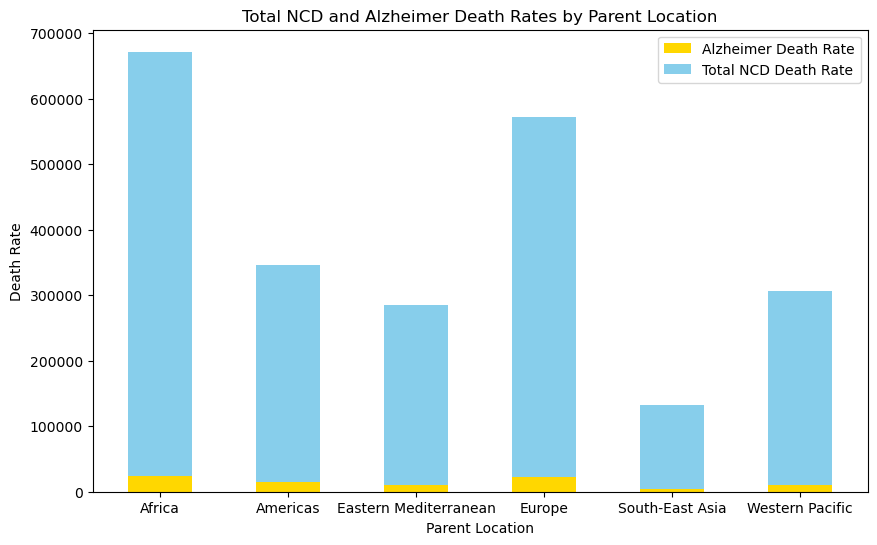

In [67]:
# Group by ParentLocation and sum the death rates
grouped_df = df.groupby('ParentLocation').sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.5
index = range(len(grouped_df))

plt.bar(index, grouped_df['Alz_Death_Rate'], bar_width, label='Alzheimer Death Rate',color="gold")
plt.bar(index, grouped_df['Total_NCD_Death_Rate'], bar_width, bottom=grouped_df['Alz_Death_Rate'], label='Total NCD Death Rate',color="skyblue")

plt.xlabel('Parent Location')
plt.ylabel('Death Rate')
plt.title('Total NCD and Alzheimer Death Rates by Parent Location')
plt.xticks(index, grouped_df.index)
plt.legend()

plt.show()

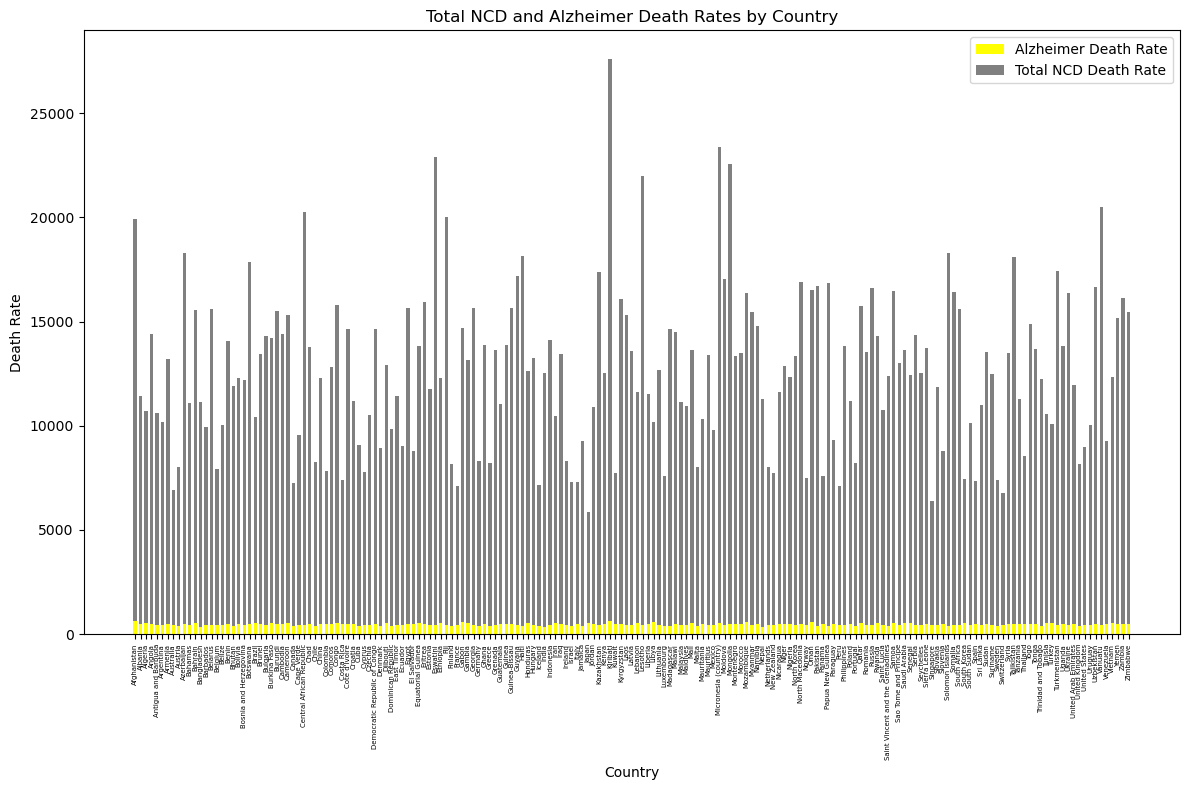

In [125]:
# Group by Country and sum the death rates
grouped_df = df.groupby('Country').sum()

# Plot the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.9  # Adjust bar width to leave space between bars
index = np.arange(len(grouped_df)) * 1.5  # Increase space between bars

plt.bar(index, grouped_df['Alz_Death_Rate'], bar_width, label='Alzheimer Death Rate', color="yellow")
plt.bar(index, grouped_df['Total_NCD_Death_Rate'], bar_width, bottom=grouped_df['Alz_Death_Rate'], label='Total NCD Death Rate', color="grey")

plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.title('Total NCD and Alzheimer Death Rates by Country')
plt.xticks(index, grouped_df.index, rotation=90,fontsize=5)
plt.legend()

plt.tight_layout()
plt.show()

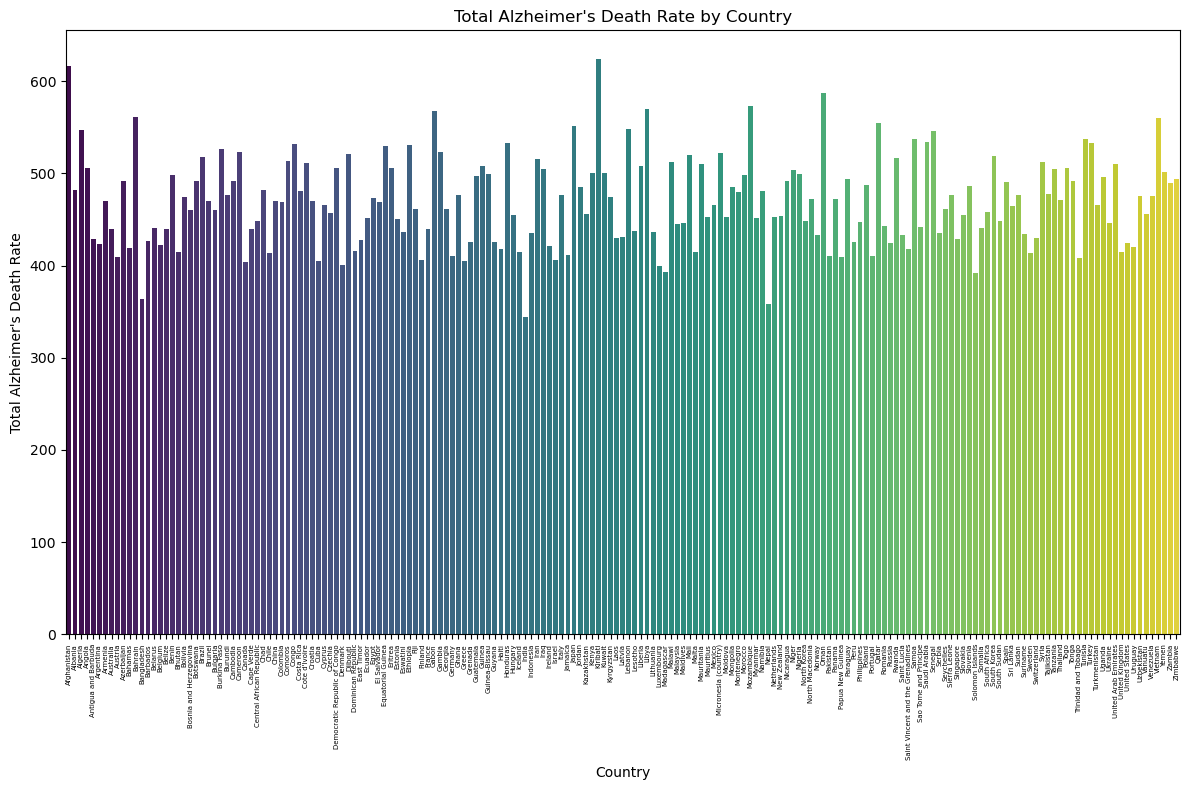

In [69]:
# Aggregate data by country
country_agg = df.groupby('Country')[['Alz_Death_Rate', 'Total_NCD_Death_Rate']].sum()

# Aggregate data by year
year_agg = df.groupby('Year')[['Alz_Death_Rate', 'Total_NCD_Death_Rate']].sum()

# Visualize total Alzheimer's death rate by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_agg.index, y=country_agg['Alz_Death_Rate'], palette='viridis')
plt.xticks(rotation=90,fontsize=5)
plt.xlabel('Country')
plt.ylabel('Total Alzheimer\'s Death Rate')
plt.title('Total Alzheimer\'s Death Rate by Country')
plt.tight_layout()
plt.show()


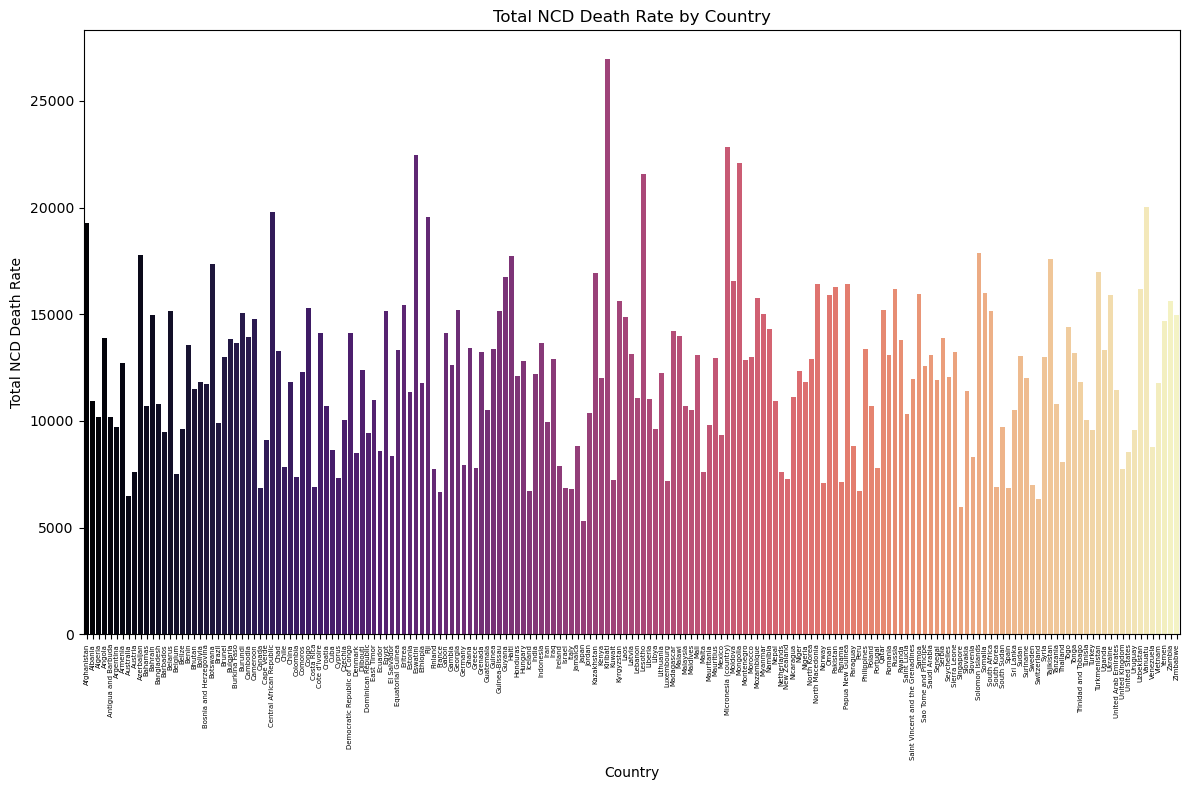

In [70]:
# Visualize total NCD death rate by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_agg.index, y=country_agg['Total_NCD_Death_Rate'], palette='magma')
plt.xticks(rotation=90,fontsize=5)
plt.xlabel('Country')
plt.ylabel('Total NCD Death Rate')
plt.title('Total NCD Death Rate by Country')
plt.tight_layout()
plt.show()

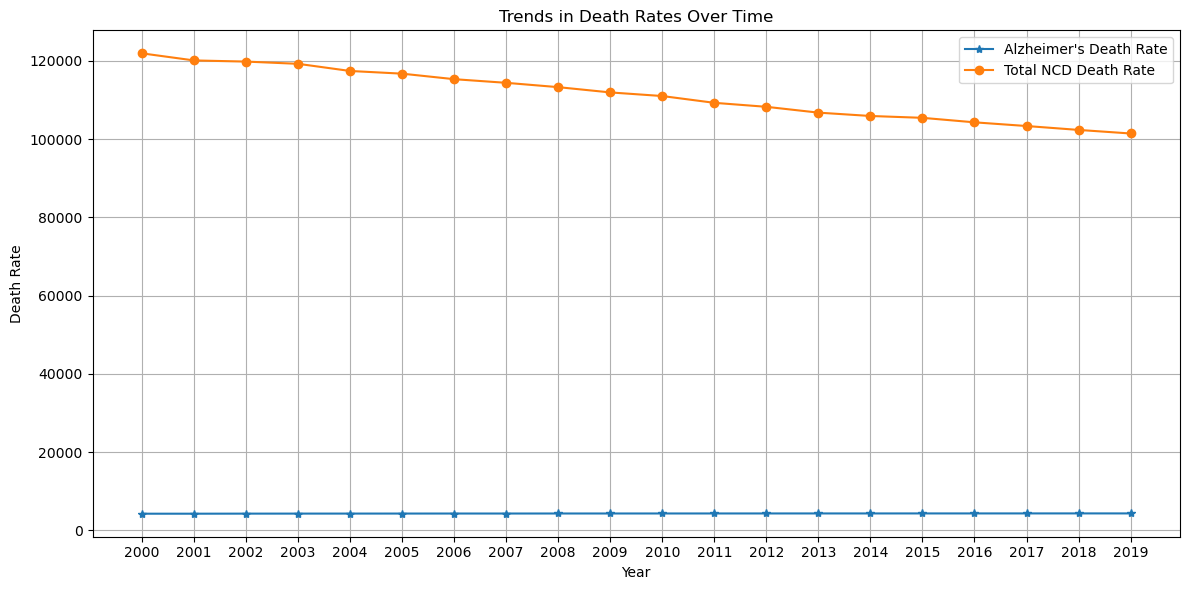

In [71]:
# Visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(year_agg.index.astype(str), year_agg['Alz_Death_Rate'], marker='*', label='Alzheimer\'s Death Rate')
plt.plot(year_agg.index.astype(str), year_agg['Total_NCD_Death_Rate'], marker='o', label='Total NCD Death Rate')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.title('Trends in Death Rates Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


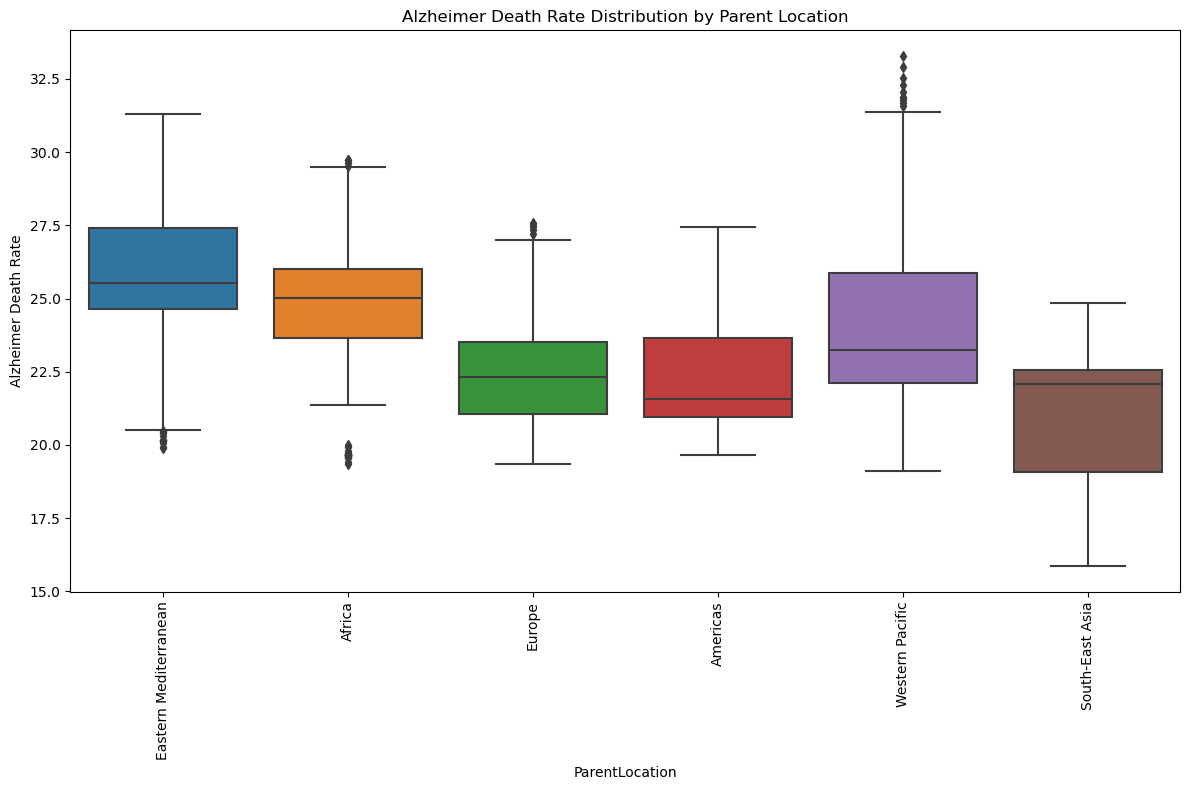

In [72]:
# Identify anomalies: Boxplot for Alzheimer's Death Rate by Parent Location
plt.figure(figsize=(12, 8))
sns.boxplot(x='ParentLocation', y='Alz_Death_Rate', data=df)
plt.xticks(rotation=90)
plt.xlabel('ParentLocation')
plt.ylabel('Alzheimer Death Rate')
plt.title('Alzheimer Death Rate Distribution by Parent Location')
plt.tight_layout()
plt.show()

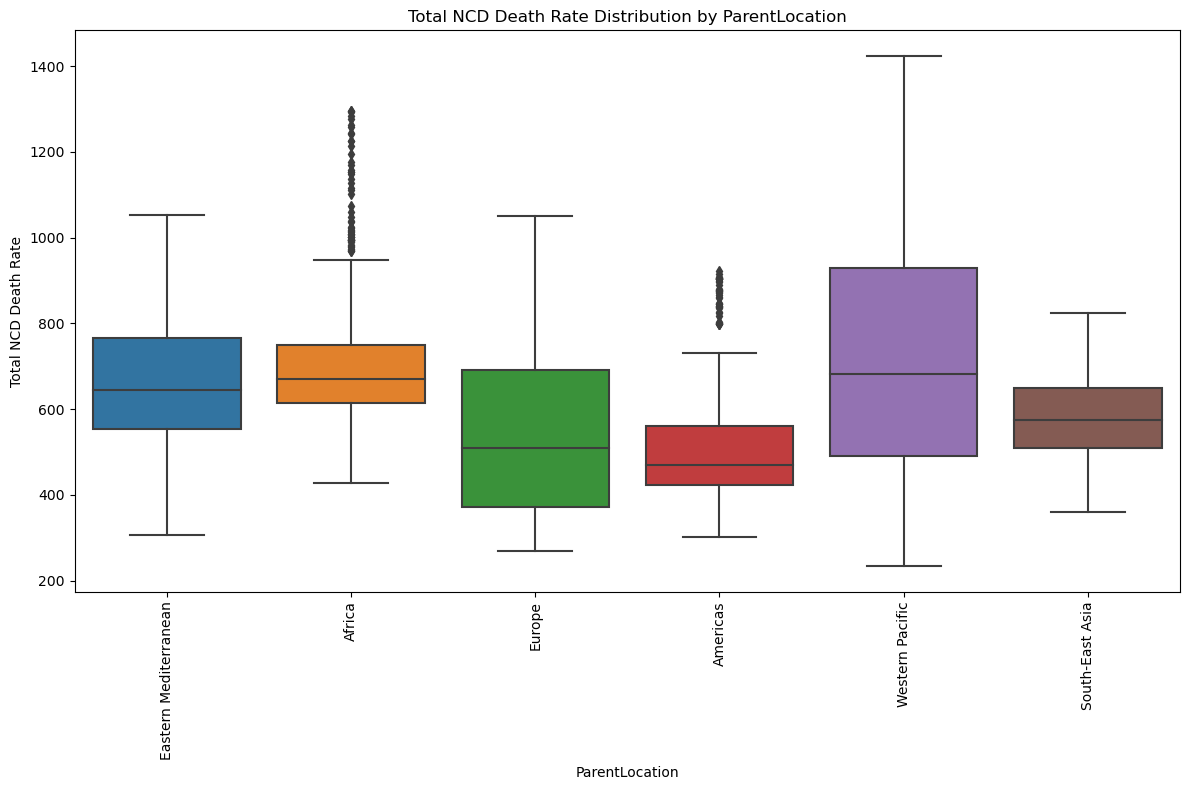

In [73]:
#Boxplot for Total NCD Death Rate by parent location
plt.figure(figsize=(12, 8))
sns.boxplot(x='ParentLocation', y='Total_NCD_Death_Rate', data=df)
plt.xticks(rotation=90)
plt.xlabel('ParentLocation')
plt.ylabel('Total NCD Death Rate')
plt.title('Total NCD Death Rate Distribution by ParentLocation')
plt.tight_layout()
plt.show()

<Axes: ylabel='Alz_Death_Rate'>

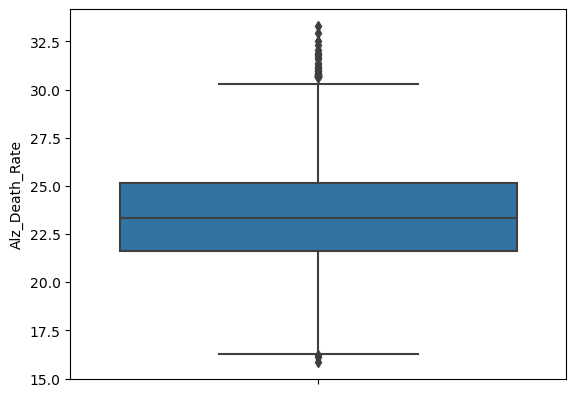

In [74]:
sns.boxplot(y='Alz_Death_Rate',data=df)

In [129]:
# lets the countries that contains outlier data 
print("Alzheimer Death Rates High outliers: ",df.Country[df.Alz_Death_Rate>30].unique())
print("Alzheimer Death Rates Low outliers: ",df.Country[df.Alz_Death_Rate<17].unique())

Alzheimer Death Rates High outliers:  ['Afghanistan' 'Kiribati']
Alzheimer Death Rates Low outliers:  ['Bangladesh' 'India' 'Nepal']


<Axes: ylabel='Total_NCD_Death_Rate'>

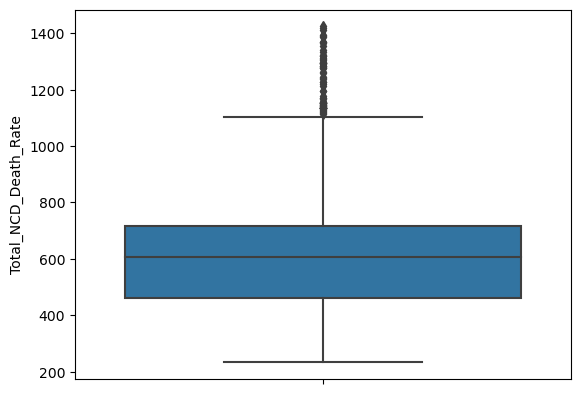

In [76]:
sns.boxplot(y='Total_NCD_Death_Rate',data=df)

In [130]:
# lets the countries that contains outlier data 
print("Total NCD Death Rate High outliers: ",df.Country[df.Total_NCD_Death_Rate>1100].unique())

Total NCD Death Rate High outliers:  ['Micronesia (country)' 'Kiribati' 'Lesotho' 'Mongolia' 'Eswatini']


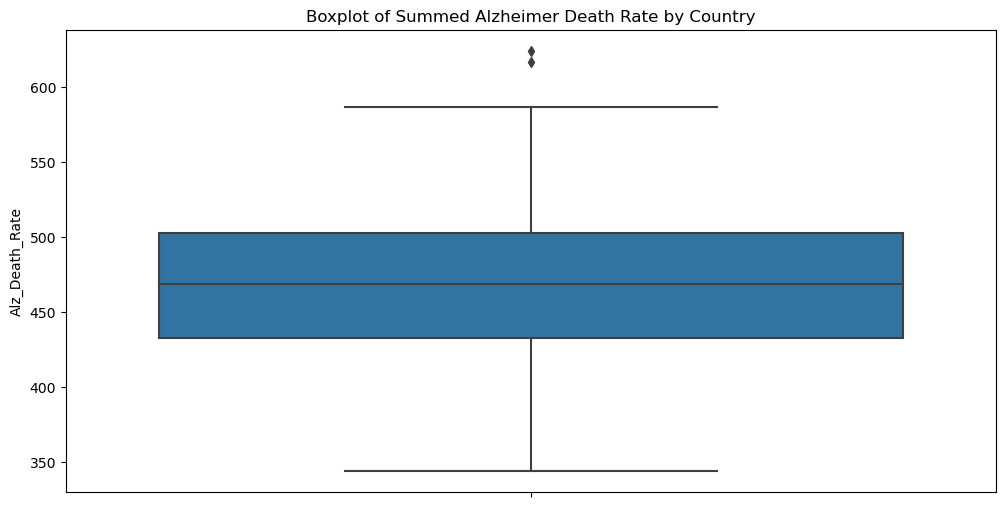

In [78]:
country_alz_sum = df.groupby('Country')['Alz_Death_Rate'].sum().reset_index()

# Visualize the aggregated data with a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y='Alz_Death_Rate', data=country_alz_sum)
plt.title('Boxplot of Summed Alzheimer Death Rate by Country')
plt.show()

In [79]:
# Identify outlier countries based on the summed deaths
country_alz_sum.Country[country_alz_sum.Alz_Death_Rate > 580].unique()  

array(['Afghanistan', 'Kiribati', 'Oman'], dtype=object)

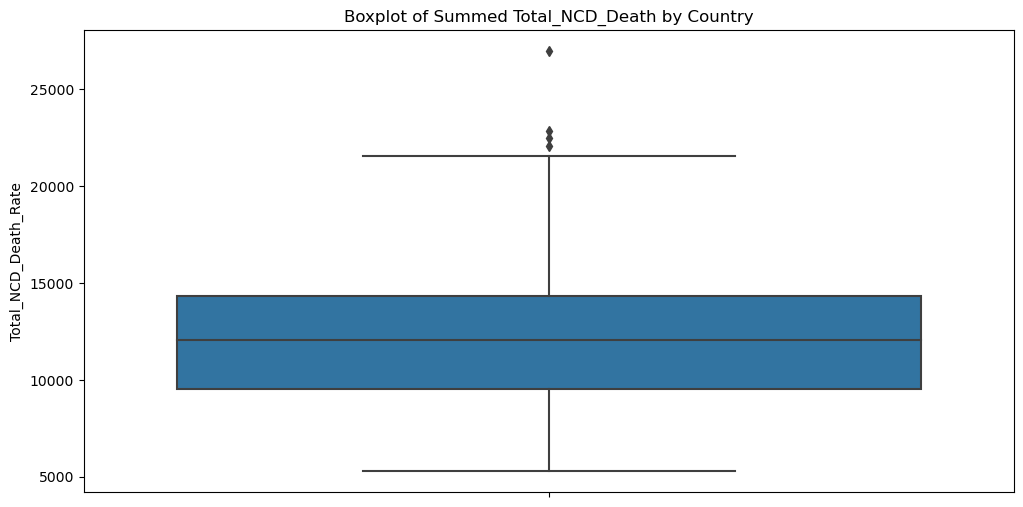

In [80]:
country_ncd_sum = df.groupby('Country')['Total_NCD_Death_Rate'].sum().reset_index()

# Visualize the aggregated data with a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y='Total_NCD_Death_Rate', data=country_ncd_sum)
plt.title('Boxplot of Summed Total_NCD_Death by Country')
plt.show()

In [81]:
country_ncd_sum.Country[country_ncd_sum.Total_NCD_Death_Rate >22000].unique()  

array(['Eswatini', 'Kiribati', 'Micronesia (country)', 'Mongolia'],
      dtype=object)

In [82]:
### checking for correlation between alzheimer death and total ncd death 
df['Alz_Death_Rate'].corr(df['Total_NCD_Death_Rate'])

0.26558555499879327

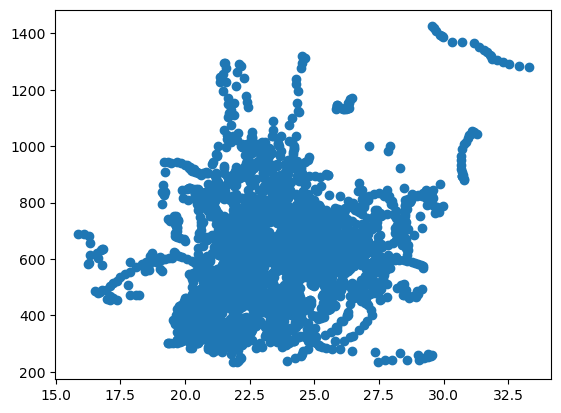

In [83]:
plt.scatter(df['Alz_Death_Rate'],df['Total_NCD_Death_Rate'])

### there is a correlation but it's not strong

### Let's encode ParentLocation so we can discover more correlations and we will drop unneeded columns

In [96]:
parentencoded=pd.get_dummies(df,columns=['ParentLocation']).drop(['Country','Country_Code','Year','ParentLocationCode'],axis=1)

In [105]:
parentencoded

,Alz_Death_Rate,Total_NCD_Death_Rate,ParentLocation_Africa,ParentLocation_Americas,ParentLocation_Eastern Mediterranean,ParentLocation_Europe,ParentLocation_South-East Asia,ParentLocation_Western Pacific
0,31.30,1041.6340,False,False,True,False,False,False
1,31.19,1050.8080,False,False,True,False,False,False
2,31.11,1051.9050,False,False,True,False,False,False
3,31.04,1042.0000,False,False,True,False,False,False
4,30.98,1038.1970,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
3655,24.83,800.0917,True,False,False,False,False,False
3656,24.88,782.6051,True,False,False,False,False,False
3657,24.91,755.6024,True,False,False,False,False,False
3658,24.97,738.4620,True,False,False,False,False,False


<Axes: >

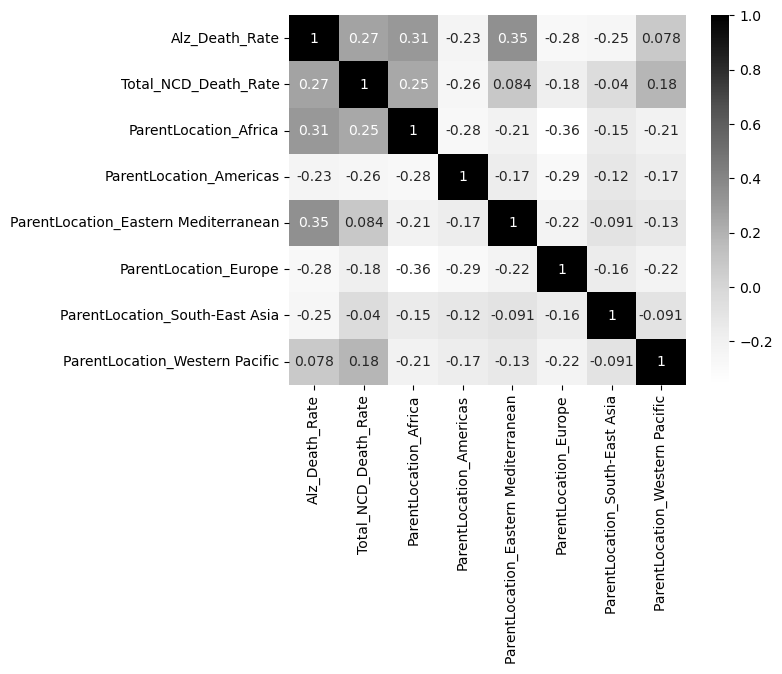

In [99]:
sns.heatmap(parentencoded.corr(),annot=True,cmap="Greys") ## heat map for correlation we need to focus on first two rows

In [84]:
## let's save our df as a csv file to upload it to looker studio
#df.to_csv('death_rates.csv', index=False)

# <font color="purple"><h2>To be countined in Looker Studio!!!</h2></font>